> ## 데이터 청년 캠퍼스 17일차
> ### <b>노재혁</b>

### 텍스트마이닝

#### 토큰화

In [2]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\No\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [67]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\No\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [1]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.corpus import kolaw

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from konlpy.corpus import kobill

In [3]:
from wordcloud import WordCloud

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)

#### konlpy 형태소 분석기 성능비교

In [6]:
okt = Okt() # Okt(twitter 분석기)
han = Hannanum() # 한나눔 분석기
kkma = Kkma() # Kkma 분석기
komoran = Komoran()  # Komoran 분석기

- text = "아버지가방에들어가신다"

- text2 = "ㄱㅐㄴㅏ리가 피어있는 동산에 누워있고싶ㄷㅏ"

- text3 = """5G 이동통신망을 빌려 사용하는 ‘5G 알뜰폰’이 올해 도입되고, 내년부터는 의무화된다.
정부는 알뜰폰 사업자(MNVO)가 통신사(MNO)에 통신망을 빌리는 비용(도매대가)을 지난해보다 큰 폭으로 낮춰, 알뜰폰 요금 인하를 유도하기로 했다. 하지만 줄어드는 알뜰폰 시장을 살릴 수 있을지는 지켜봐야 하는 상황이다.
과학기술정보통신부는 알뜰폰 활성화 추진대책을 25일 발표했다. 알뜰폰 가입자는 800만명으로 이동통신 시장의 12%를 차지한다. 2011년 출시 뒤 저렴한 요금제로 통신비 부담을 낮춰왔다. 하지만 지난해 5월 통신 3사가 준보편제 요금을 내놓은 이후 알뜰폰 이탈 현상이 지속되고 있다.
우선 올해 안에 3개 이상의 5G 알뜰폰이 시장에 나온다. 통신사가 5G망을 알뜰폰 사업자에게 도매 제공할지 여부는 통신사 자율로 정한다. 앞서 LG유플러스는 오는 10월 알뜰폰 사업을 시작하는 KB국민은행에 5G망을 제공한다고 밝힌 바 있다. SK텔레콤와 KT도 특정 제휴사를 선택해 올해 안에 5G 알뜰폰을 내놓기로 했다.
내년부터는 5G 알뜰폰 제공이 의무화된다. 지난 22일자로 종료된 도매제공 의무제도의 유효기간을 2022년 9월22일까지 연장하는 전기통신사업법 개정안이 국회에서 통과되면, 관련 고시를 개정해 SK텔레콤의 5G망 도매제공을 의무화하겠다는 것이다.
과기정통부 관계자는 “SK텔레콤이 자사와 계약을 맺은 13개 알뜰폰 사업자에게 5G망을 의무 제공하면, 그 외 31개의 알뜰폰 사업자들이 경쟁에서 밀릴 것을 우려해 KT와 LG유플러스도 5G망을 제공하게 될 것”이라고 내다봤다.
알뜰폰 사업자가 상품을 만드는 방식 크게 2가지다. 하나는 통신사로부터 음성·문자·데이터를 도매로 사들인 뒤 이를 바탕으로 통신사보다 저렴한 요금제를 내놓는 방식(종량제 도매제공)이다. 이를 위해 정부는 도매대가 인하율을 음성 17.8%, 데이터 19.2%, 단문메시지 1.15%로, 지난해 음성 15.1%, 데이터 19.1%, 단문메시지 1.13%에 비해 높여 잡았다.
또 다른 방식은 일정비용을 통신사에 내고 통신사의 정액 요금제를 그대로 판매하면서, 그 차액의 범위에서 저렴한 요금제를 내놓는 방식(수익배분 도매제공)이다. 정부는 SK텔레콤의 준보편 요금제인 ‘T플랜 요금제’를 알뜰폰 사업자가 재판매할 수 있게 했다. 기존에 SK텔레콤이 도매제공했던 ‘밴드데이터 요금제’의 최고구간의 대가도 1.5%포인트 낮췄다.
알뜰폰 업계는 대체로 반기는 분위기지만, 알뜰폰 시장을 살릴 수 있을지에는 의구심을 갖고 있다. 업계 관계자는 “도매대가 인하율이 크고, 5G망을 제공하는 것은 긍정적”이라면서도 “수익배분 도매제공의 의무화, 설비를 가진 업체에 대한 접속료 정산 도입 등의 제도적 개선이 필요하다”고 말했다."""

In [7]:
# 각 모듈별로 분석 결과 비교
module_list = [okt, han, kkma, komoran]
text_list = ["아버지가방에들어가신다", 
             "ㄱㅐㄴㅏ리가 피어있는 동산에 누워있고싶ㄷㅏ", 
             "5G 이동통신망을 빌려 사용하는 ‘5G 알뜰폰’이 올해 도입되고, 내년부터는 의무화된다.정부는 알뜰폰 사업자(MNVO)가 통신사(MNO)에 통신망을 빌리는 비용(도매대가)을 지난해보다 큰 폭으로 낮춰, 알뜰폰 요금 인하를 유도하기로 했다. 하지만 줄어드는 알뜰폰 시장을 살릴 수 있을지는 지켜봐야 하는 상황이다.과학기술정보통신부는 알뜰폰 활성화 추진대책을 25일 발표했다. 알뜰폰 가입자는 800만명으로 이동통신 시장의 12%를 차지한다. 2011년 출시 뒤 저렴한 요금제로 통신비 부담을 낮춰왔다. 하지만 지난해 5월 통신 3사가 준보편제 요금을 내놓은 이후 알뜰폰 이탈 현상이 지속되고 있다.우선 올해 안에 3개 이상의 5G 알뜰폰이 시장에 나온다. 통신사가 5G망을 알뜰폰 사업자에게 도매 제공할지 여부는 통신사 자율로 정한다. 앞서 LG유플러스는 오는 10월 알뜰폰 사업을 시작하는 KB국민은행에 5G망을 제공한다고 밝힌 바 있다. SK텔레콤와 KT도 특정 제휴사를 선택해 올해 안에 5G 알뜰폰을 내놓기로 했다.내년부터는 5G 알뜰폰 제공이 의무화된다. 지난 22일자로 종료된 도매제공 의무제도의 유효기간을 2022년 9월22일까지 연장하는 전기통신사업법 개정안이 국회에서 통과되면, 관련 고시를 개정해 SK텔레콤의 5G망 도매제공을 의무화하겠다는 것이다.과기정통부 관계자는 “SK텔레콤이 자사와 계약을 맺은 13개 알뜰폰 사업자에게 5G망을 의무 제공하면, 그 외 31개의 알뜰폰 사업자들이 경쟁에서 밀릴 것을 우려해 KT와 LG유플러스도 5G망을 제공하게 될 것”이라고 내다봤다.알뜰폰 사업자가 상품을 만드는 방식 크게 2가지다. 하나는 통신사로부터 음성·문자·데이터를 도매로 사들인 뒤 이를 바탕으로 통신사보다 저렴한 요금제를 내놓는 방식(종량제 도매제공)이다. 이를 위해 정부는 도매대가 인하율을 음성 17.8%, 데이터 19.2%, 단문메시지 1.15%로, 지난해 음성 15.1%, 데이터 19.1%, 단문메시지 1.13%에 비해 높여 잡았다.또 다른 방식은 일정비용을 통신사에 내고 통신사의 정액 요금제를 그대로 판매하면서, 그 차액의 범위에서 저렴한 요금제를 내놓는 방식(수익배분 도매제공)이다. 정부는 SK텔레콤의 준보편 요금제인 ‘T플랜 요금제’를 알뜰폰 사업자가 재판매할 수 있게 했다. 기존에 SK텔레콤이 도매제공했던 ‘밴드데이터 요금제’의 최고구간의 대가도 1.5%포인트 낮췄다.알뜰폰 업계는 대체로 반기는 분위기지만, 알뜰폰 시장을 살릴 수 있을지에는 의구심을 갖고 있다. 업계 관계자는 “도매대가 인하율이 크고, 5G망을 제공하는 것은 긍정적”이라면서도 “수익배분 도매제공의 의무화, 설비를 가진 업체에 대한 접속료 정산 도입 등의 제도적 개선이 필요하다”고 말했다."]

for module in module_list:
    for text in text_list: 
        print(f'{module}\n에서의 형태소분석 {module.morphs(text)}\n{str(module)}\n에서의 품사 태깅{module.pos(text)}\n{str(module)}\n에서의 명사 추출{module.nouns(text)}\n\n')

에서의 형태소분석 ['아버지', '가방', '에', '들어가신다']
에서의 품사 태깅[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]
에서의 명사 추출['아버지', '가방']


에서의 형태소분석 ['ㄱㅐㄴㅏ', '리가', '피어있는', '동산', '에', '누워있고싶', 'ㄷㅏ']
에서의 품사 태깅[('ㄱㅐㄴㅏ', 'KoreanParticle'), ('리가', 'Noun'), ('피어있는', 'Verb'), ('동산', 'Noun'), ('에', 'Josa'), ('누워있고싶', 'Verb'), ('ㄷㅏ', 'KoreanParticle')]
에서의 명사 추출['리가', '동산']


에서의 형태소분석 ['5', 'G', '이', '동', '통신망', '을', '빌려', '사용', '하는', '‘', '5', 'G', '알뜰폰', '’', '이', '올해', '도입', '되고', ',', '내년', '부터는', '의무', '화', '된다', '.', '정부', '는', '알뜰폰', '사업자', '(', 'MNVO', ')', '가', '통신사', '(', 'MNO', ')', '에', '통신망', '을', '빌리는', '비용', '(', '도매', '대가', ')', '을', '지난해', '보다', '큰', '폭', '으로', '낮춰', ',', '알뜰폰', '요금', '인하', '를', '유도', '하기로', '했다', '.', '하지만', '줄어드는', '알뜰폰', '시장', '을', '살릴', '수', '있을지는', '지켜봐야', '하는', '상황', '이다', '.', '과학기술', '정보통신부', '는', '알뜰폰', '활성화', '추진', '대책', '을', '25일', '발표', '했다', '.', '알뜰폰', '가입자', '는', '800만', '명으로', '이동통신', '시장', '의', '12%', '를', '차지', '한', '다', '.', '2011년', '출시', 

> ### 정제

- #### 복습: 숫자, 문장부호, 특수문자 제거(정규표현식)

In [8]:
import re

In [9]:
text1 = "서울 부동산 가격이 올해 들어 평균 30% 상승했습니다."
text2 = "*서울 부동산 가격이 올해 들어 평균 30% 상승했습니다!"
text3 = "*서울 부동산 가격이 올해 들어 평균 30% 상승했습니다!"

In [10]:
re.sub("[0-9]+", "", text1) # 숫자 제거

'서울 부동산 가격이 올해 들어 평균 % 상승했습니다.'

In [11]:
re.sub("[\W+]", " ", text2) # 특수문자 문장부호 제거

' 서울 부동산 가격이 올해 들어 평균 30  상승했습니다 '

In [12]:
re.sub("[W*]", " ", text3) # *만 제거

' 서울 부동산 가격이 올해 들어 평균 30% 상승했습니다!'

- example = "Family is not an important thing. It's everything."

In [13]:
# stopwords 적용한 token
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)
result = []

for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
print(word_tokens) # 단순 토큰시킨 결과
print(result) # 토큰 중에서 stopwords를 적용한 결과

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [14]:
# 법안에 관련된 텍스트 자료
files_ko = kobill.fileids()
doc_ko = kobill.open(files_ko[0]).read()

In [23]:
# 명사 추출
nouns = okt.nouns(doc_ko)
ko = nltk.Text(nouns, name='의안 제1809894호')
ko.vocab()

print(len(ko.tokens)) # 명사 토큰 모든 결과 list자료
print(len(set(ko.tokens))) # 중복 제거한 set자료

735
250


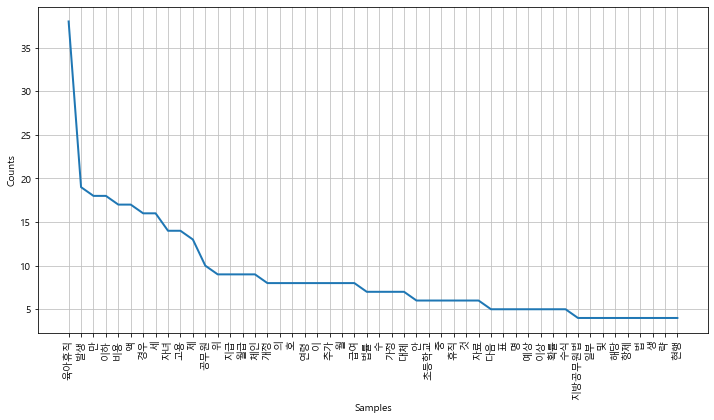

In [18]:
plt.figure(figsize=(12, 6))
ko.plot(50)

#plt.xticks(rotation=45) # 왜 안되지?
# transpose해서 보여주는 방법은?

plt.show()

In [19]:
# stopwords를 적용한 명사
stopwords = ['정', '제', '및', '안', '자', '과', '수', '의', '이', '발']
ko = [each_word for each_word in ko if each_word not in stopwords]
ko = nltk.Text(ko, name='의안 제1809894호')
ko.vocab()

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '번',
 '호',
 '발의',
 '연월일',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '항제',
 '호',
 '법률',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '로',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '휴직',
 '생',
 '략',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '다만',
 '호',
 '경우',
 '대통령령',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현행',
 '만',
 '

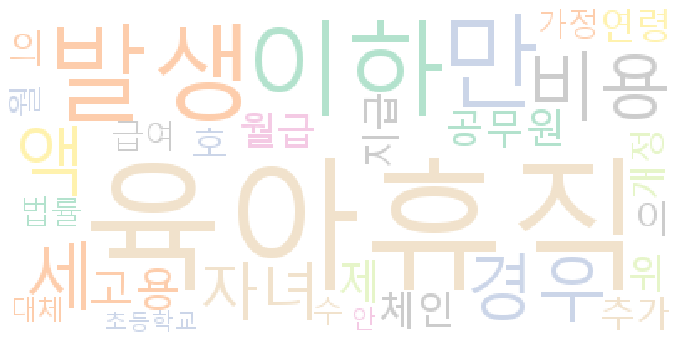

In [42]:
# 워드클라우드 적용
data = ko.vocab().most_common(30) # 빈도 높은 30개 단어 추출

wordcloud = WordCloud(font_path=path, background_color='white', colormap='Pastel2').generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()